**The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.
Explore and analyze the data to discover key findings pertaining to terrorist activities.**

In [1]:
#Conecting to google drive 
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing all the required liabraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Importing the dataset 
path = ('/content/drive/MyDrive/Python for data science/Project/')
name = ('Global Terrorism Data.csv')
df = pd.read_csv(path+name, encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#length of the data frame 
df.shape 

(181691, 135)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
#columns in the dataframe
df.columns 

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
#setting the display options 
pd.set_option('display.max_columns', 150)

In [10]:
df.head() 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [11]:
#Renaming the column names which are required 
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','city':'City','region_txt':'Region','latitude':
                   'Latitude','longitude':'Longitude','attacktype1_txt':'Attack', 'targtype1_txt':'Target', 'targsubtype1_txt':'Sub_Target', 'motive':'Motive', 
                   'weaptype1_txt':'Weapon', 'nkill':'Kills', 'nwound':'Wound', 'propextent_txt':'Property', 'ransomamt':'Ransom_Amt',
                   'ransompaid':'Ransom_paid'}, inplace=True)

In [12]:
#Copying the columns which are required into a new dataset 
data = df[['Year', 'Month', 'Day', 'Country', 'State', 'City', 'Region', 'Latitude', 'Longitude', 
           'Attack', 'Target', 'Sub_Target', 'Motive', 'Weapon', 'Kills', 'Wound', 'Property', 'Ransom_Amt', 'Ransom_paid']]

In [13]:
#first 5 fields in the required dataset 
data.head()

,Year,Month,Day,Country,State,City,Region,Latitude,Longitude,Attack,Target,Sub_Target,Motive,Weapon,Kills,Wound,Property,Ransom_Amt,Ransom_paid
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,NaN,Unknown,1.0,0.0,NaN,NaN,NaN
1,1970,0,0,Mexico,Federal,Mexico city,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",NaN,Unknown,0.0,0.0,NaN,800000.0,NaN
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,NaN,Unknown,1.0,0.0,NaN,NaN,NaN
3,1970,1,0,Greece,Attica,Athens,Western Europe,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,Explosives,NaN,NaN,NaN,NaN,NaN
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN


In [17]:
#last 5 fields in the required dataset 
data.tail()

,Year,Month,Day,Country,State,City,Region,Latitude,Longitude,Attack,Target,Sub_Target,Motive,Weapon,Kills,Wound,Property,Ransom_Amt,Ransom_paid
181686,2017,12,31,Somalia,Middle Shebelle,Ceelka Geelow,Sub-Saharan Africa,2.35967,45.385,Armed Assault,Military,Military Checkpoint,Unknown,Firearms,1.0,2.0,Unknown,0.0,0.0
181687,2017,12,31,Syria,Lattakia,Jableh,Middle East & North Africa,35.4073,35.9427,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Unknown,Explosives,2.0,7.0,Unknown,0.0,0.0
181688,2017,12,31,Philippines,Maguindanao,Kubentog,Southeast Asia,6.90074,124.438,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Unknown,Incendiary,0.0,0.0,Unknown,0.0,0.0
181689,2017,12,31,India,Manipur,Imphal,South Asia,24.7983,93.9404,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives,0.0,0.0,Unknown,0.0,0.0
181690,2017,12,31,Philippines,Maguindanao,Cotabato City,Southeast Asia,7.20959,124.242,Bombing/Explosion,Unknown,Unknown,Unknown,Explosives,0.0,0.0,Unknown,0.0,0.0


In [14]:
#describing the data with its info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   City         181257 non-null  object 
 6   Region       181691 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Attack       181691 non-null  object 
 10  Target       181691 non-null  object 
 11  Sub_Target   171318 non-null  object 
 12  Motive       50561 non-null   object 
 13  Weapon       181691 non-null  object 
 14  Kills        171378 non-null  float64
 15  Wound        165380 non-null  float64
 16  Property     64065 non-null   object 
 17  Ransom_Amt   1350 non-null    float64
 18  Ransom_paid  774 non-nul

In [15]:
#Filling the NaN values 
data['State'].fillna('Unknown', inplace=True)
data['City'].fillna('Unknown', inplace=True)
data['Region'].fillna('Unknown', inplace=True)
data['Latitude'].fillna('Unknown', inplace=True)
data['Longitude'].fillna('Unknown', inplace=True)
data['Sub_Target'].fillna('Unknown', inplace=True)
data['Motive'].fillna('Unknown', inplace=True)
data['Kills'].fillna(0, inplace=True)
data['Wound'].fillna(0, inplace=True)
data['Property'].fillna('Unknown', inplace=True)
data['Ransom_Amt'].fillna(0, inplace=True)
data['Ransom_paid'].fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [16]:
#Checking any presence of NaN values in the data set
data.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
City           0
Region         0
Latitude       0
Longitude      0
Attack         0
Target         0
Sub_Target     0
Motive         0
Weapon         0
Kills          0
Wound          0
Property       0
Ransom_Amt     0
Ransom_paid    0
dtype: int64

In [18]:
#Grouping the year to find out the total incidents
year = data['Year'].value_counts().sort_index()

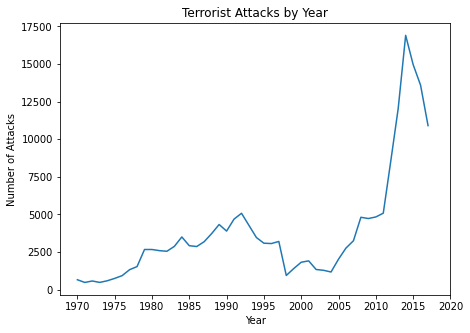

In [19]:
#Plotting the Year wise incidents 
plt.figure(figsize=(7,5))
plt.plot(year)
plt.title("Terrorist Attacks by Year")
plt.ylabel("Number of Attacks")
plt.xlabel("Year")
plt.xticks(np.arange(1970, 2025, 5))
plt.show()

**Remaks:**

Showing the number of attacks over the years.

From the data we can say that in the year 2014 there are maximum number of attacks through all over the world.

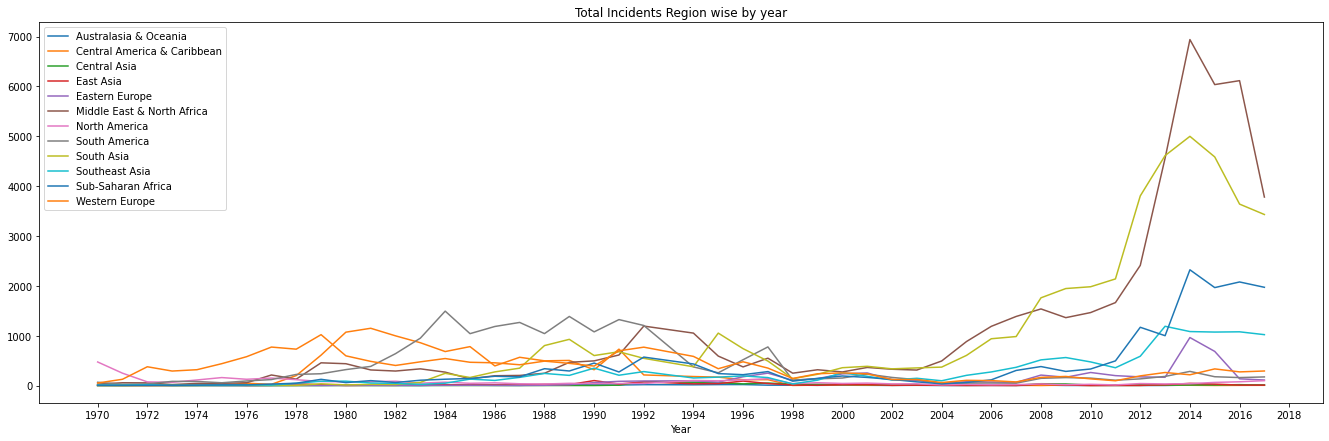

In [36]:
#Terrorist attacks in different regions year wise
terror_region = pd.crosstab(data['Year'], data['Region'])
fig = plt.figure(figsize=(23,7))
ax = fig.gca()
terror_region.plot(ax=ax)
plt.title("Total Incidents Region wise by year")
plt.xticks(np.arange(1970, 2020, 2))
plt.legend()
plt.show()

**Remarks**

From the above data we can say that there is rise during 1980 to 1997 laster the raise is seen in the number of incidents in between the years of 2008 and 2015.

In [20]:
#Attacks occured as per the region
region = data['Region'].value_counts()
region 

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

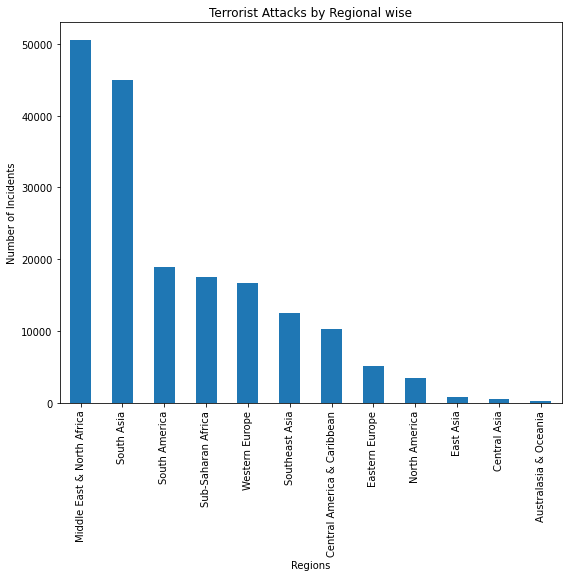

In [21]:
#Plotting the data of regional wise attacks
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
region.plot(kind='bar', ax=ax)
ax.set_title("Terrorist Attacks by Regional wise")
ax.set_xlabel("Regions")
ax.set_ylabel("Number of Incidents")
plt.show()

**Remarks**


From the chat we can say that the Middle East & North Africa is getting attacked mostly.

Austraiasia & Occeania is least attacked.

In [24]:
#Finding the attacks and their frequency 
attack = data['Attack'].value_counts()
attack 

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack, dtype: int64

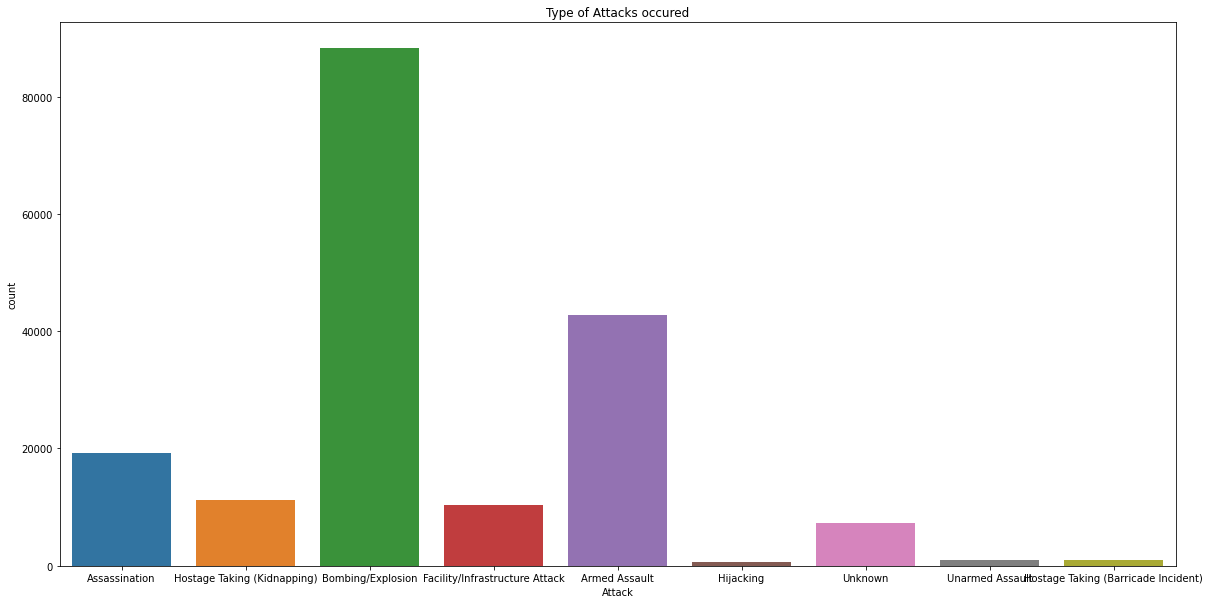

In [25]:
#Plotting the data of Counts of Attacks and their types 
plt.figure(figsize=(20,10))
sns.countplot(x='Attack', data=data)
plt.title("Type of Attacks occured")
plt.show() 

**Remarks**

Bombing/Explosion is the most frequent attack taking place.

Hijacking is the least attack.

In [27]:
#Summing the total killed and wounded by region wise 
killed_wounded = data.groupby(['Region']).agg({'Kills':'sum', 'Wound':'sum'})
killed_wounded

,Kills,Wound
Region,,
Australasia & Oceania,150.0,260.0
Central America & Caribbean,28708.0,8991.0
Central Asia,1000.0,2009.0
East Asia,1152.0,9213.0
Eastern Europe,7415.0,12045.0
Middle East & North Africa,137642.0,214308.0
North America,4916.0,21531.0
South America,28849.0,16704.0
South Asia,101319.0,141360.0


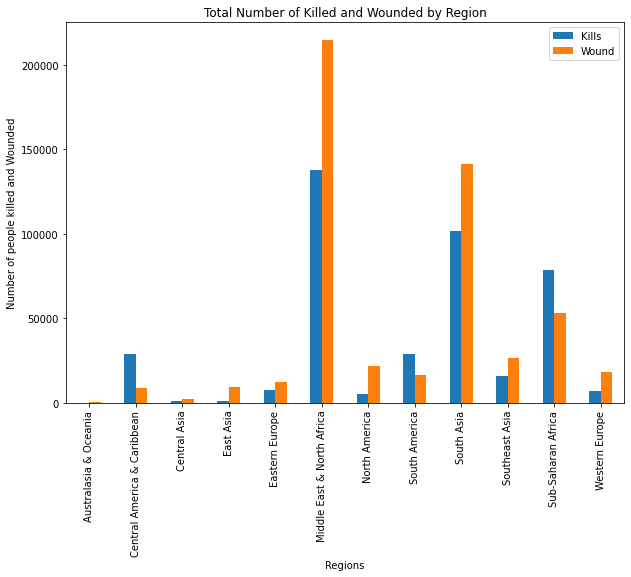

In [28]:
#Plotting the data of killed and wounded by region wise 
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
killed_wounded.plot(kind='bar', ax=ax)
plt.title("Total Number of Killed and Wounded by Region")
plt.ylabel("Number of people killed and Wounded")
plt.xlabel("Regions")
plt.show() 

**Remarks**

From the data we can say that the Middle East & North Africa and Australasia & Oceania regions are the most and least effected regions respectively.

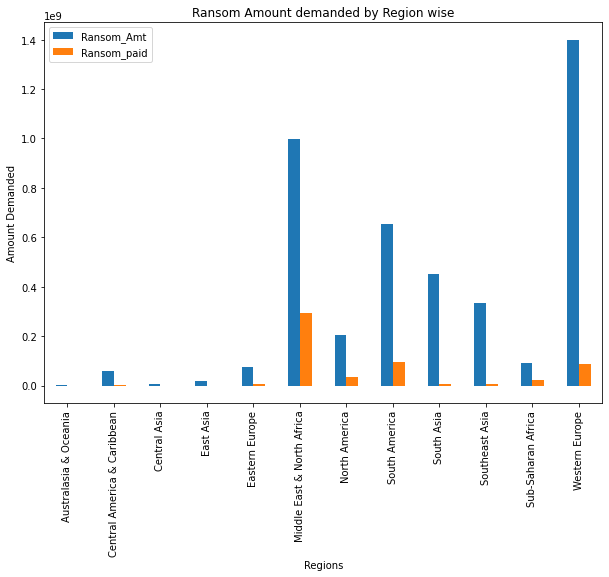

In [37]:
#Plotting the data of Ransom amount demanded by region wise
ransom = data.groupby(['Region']).agg({'Ransom_Amt':'sum', 'Ransom_paid':'sum'})

fig = plt.figure(figsize=(10,7))
ax = fig.gca()
ransom.plot(kind='bar', ax=ax)
plt.title("Ransom Amount demanded by Region wise")
plt.ylabel("Amount Demanded")
plt.xlabel("Regions")
plt.show()

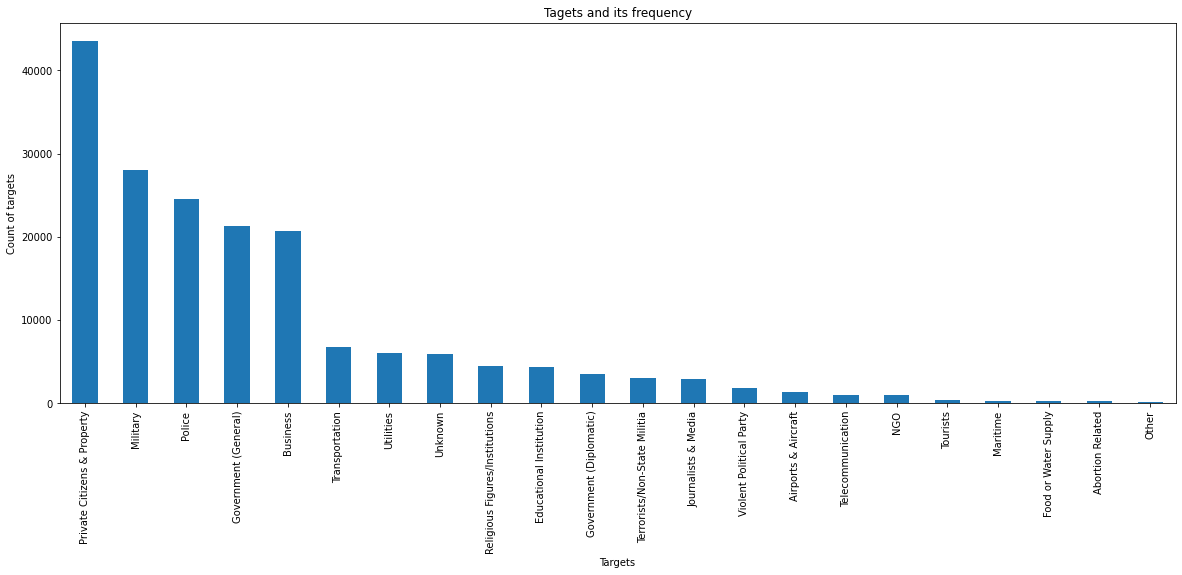

In [22]:
target = data['Target'].value_counts()

fig = plt.figure(figsize=(20,7))
ax = fig.gca()
target.plot(kind='bar', ax=ax)
plt.title("Tagets and its frequency")
plt.ylabel("Count of targets")
plt.xlabel("Targets")
plt.show()

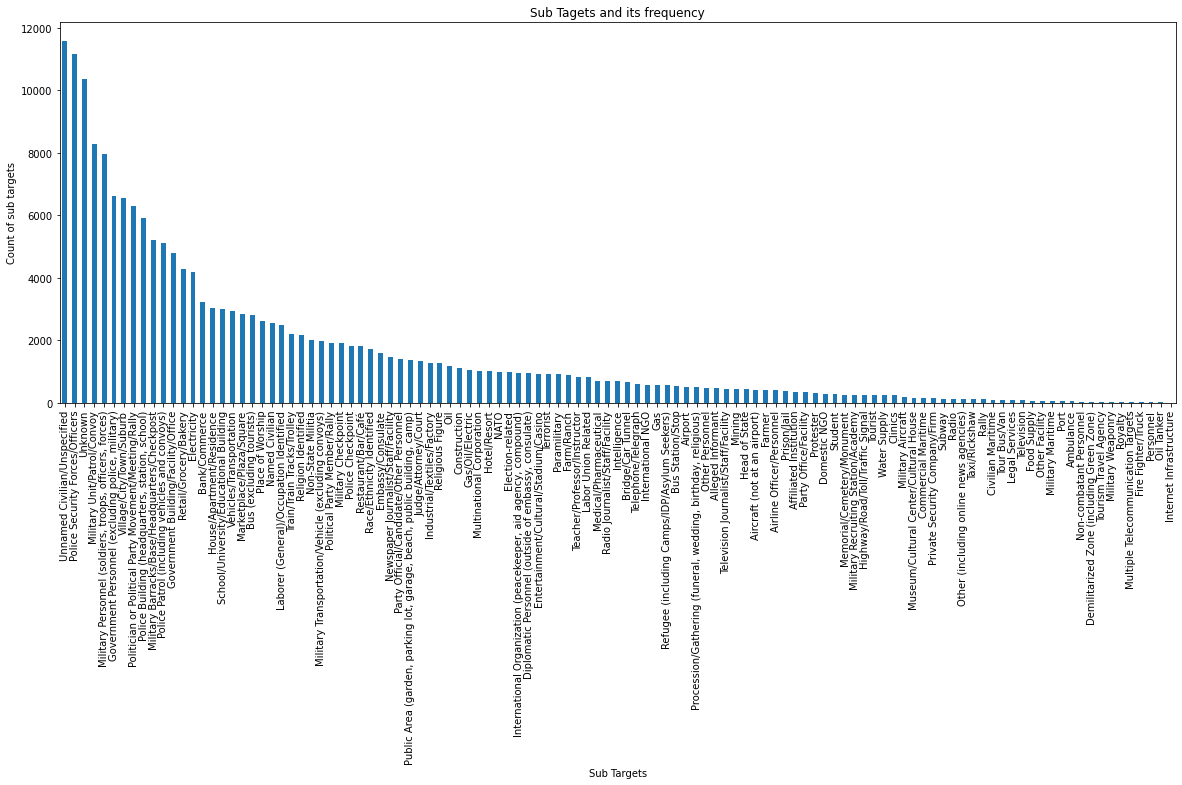

In [23]:
sub_target = data['Sub_Target'].value_counts()

fig = plt.figure(figsize=(20,7))
ax = fig.gca()
sub_target.plot(kind='bar', ax=ax)
plt.title("Sub Tagets and its frequency")
plt.ylabel("Count of sub targets")
plt.xlabel("Sub Targets")
plt.show()

In [45]:
middle_east_north_africa = pd.DataFrame()

middle_east_north_africa = data[data['Region'] == 'Middle East & North Africa']

In [47]:
middle_east_north_africa['Country'].value_counts()

Iraq                        24636
Turkey                       4292
Yemen                        3347
Algeria                      2743
Egypt                        2479
Lebanon                      2478
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Israel                       2183
Iran                          684
Saudi Arabia                  371
Bahrain                       207
Jordan                        113
Tunisia                       109
Kuwait                         76
Morocco                        36
United Arab Emirates           22
Qatar                           7
North Yemen                     6
Western Sahara                  5
South Yemen                     2
International                   1
Name: Country, dtype: int64

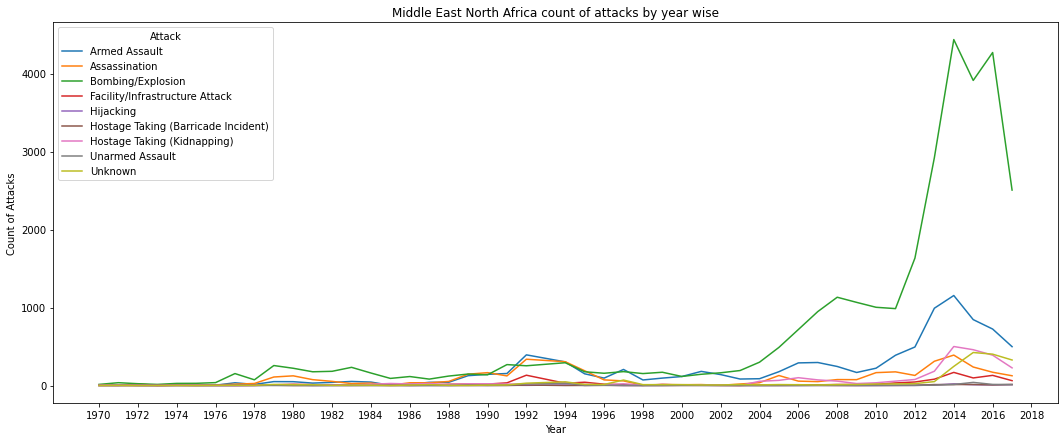

In [46]:
middle_east_north_africa_year_attack = pd.crosstab(middle_east_north_africa['Year'], middle_east_north_africa['Attack'])
fig = plt.figure(figsize=(18,7))
ax = fig.gca()
middle_east_north_africa_year_attack.plot(ax=ax)
plt.xticks(np.arange(1970, 2020, 2))
plt.title("Middle East North Africa count of attacks by year wise")
plt.ylabel("Count of Attacks")
plt.show()

In [ ]:
india.Country.value_counts()

India    11960
Name: Country, dtype: int64

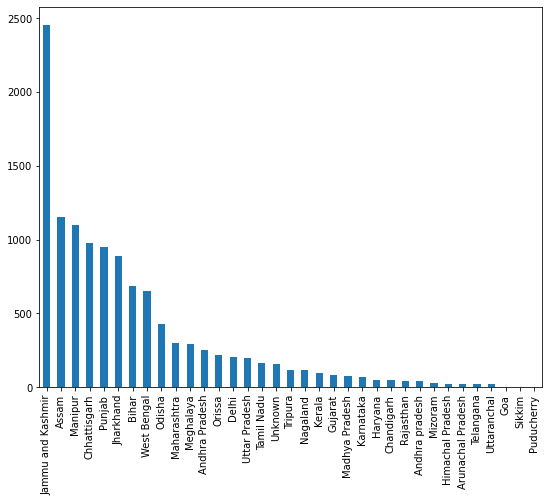

In [ ]:
y = india['State'].value_counts()
plt.figure(figsize=(9,7))
y.plot(kind='bar')
plt.show()

In [ ]:
p = india.groupby(['State']).agg({'Kills':'sum', 'Wound':'sum'})

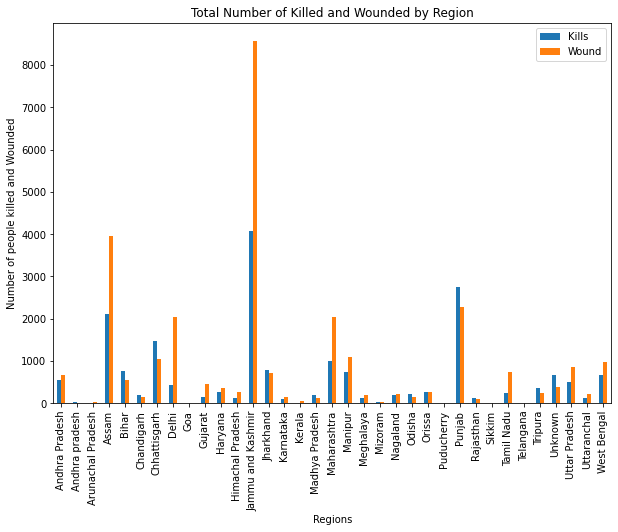

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
p.plot(kind='bar', ax=ax)
plt.title("Total Number of Killed and Wounded by Region")
plt.ylabel("Number of people killed and Wounded")
plt.xlabel("Regions")
plt.show()

In [ ]:
jammu = india[india['State']=='Jammu and Kashmir']

In [ ]:
t = jammu.groupby(['Attack']).agg({'Kills':'sum', 'Wound':'sum'})
t

,Kills,Wound
Attack,,
Armed Assault,2227.0,1665.0
Assassination,297.0,195.0
Bombing/Explosion,1274.0,6546.0
Facility/Infrastructure Attack,13.0,12.0
Hijacking,16.0,17.0
Hostage Taking (Barricade Incident),24.0,16.0
Hostage Taking (Kidnapping),111.0,51.0
Unarmed Assault,7.0,42.0
Unknown,110.0,25.0


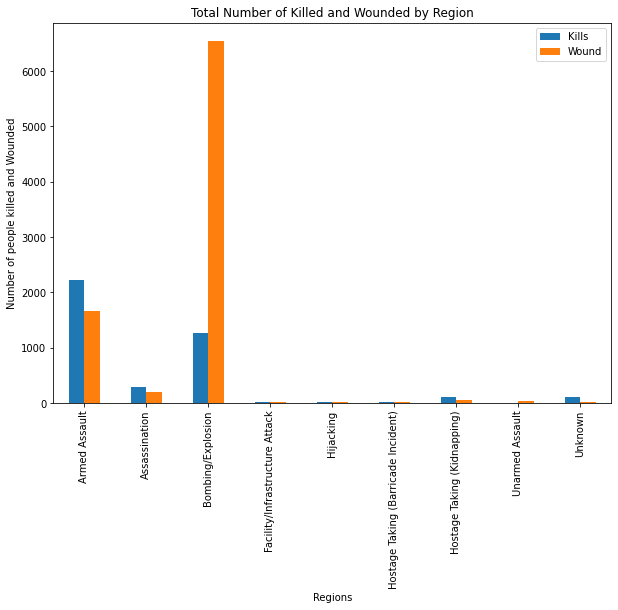

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
t.plot(kind='bar', ax=ax)
plt.title("Total Number of Killed and Wounded by Region")
plt.ylabel("Number of people killed and Wounded")
plt.xlabel("Regions")
plt.show()